# LOADING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
data=pd.read_csv('D:\\AI STUDY MATERIAL\\ML\\banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Attribute Information:

Input variables:
# bank client data:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
data.shape

(41188, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# EDA

As stated above if 'duration'=0 then outcome 'y'=0. And since only 4 values are 0 so we can drop these values.

In [6]:
d=np.where(data['duration']==0)
d

(array([ 8976, 30156, 32502, 36969], dtype=int64),)

In [7]:
data=data.drop(d[0])

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). Hence we will change this column as previously contacted or not. 1 means yes and 0 means no. If value is 999 then it means 0 i.e not contacted.

In [8]:
data['pdays']=np.where(data['pdays']==999,0,1)

In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.00000,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000
mean,40.023529,258.310096,2.567381,0.036786,0.172980,0.08192,93.575686,-40.502508,3.621337,5167.037145,0.112665
std,10.421044,259.279344,2.769895,0.188239,0.494922,1.57096,0.578849,4.628128,1.734438,72.252762,0.316187
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,0.000000,0.000000,-1.80000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,0.000000,0.000000,1.10000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,1.000000,7.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

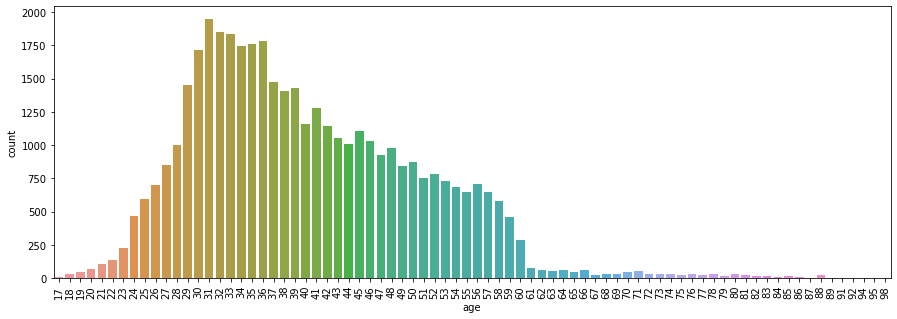

In [10]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "age",ax=ax, data=data)
plt.xticks(rotation=90)

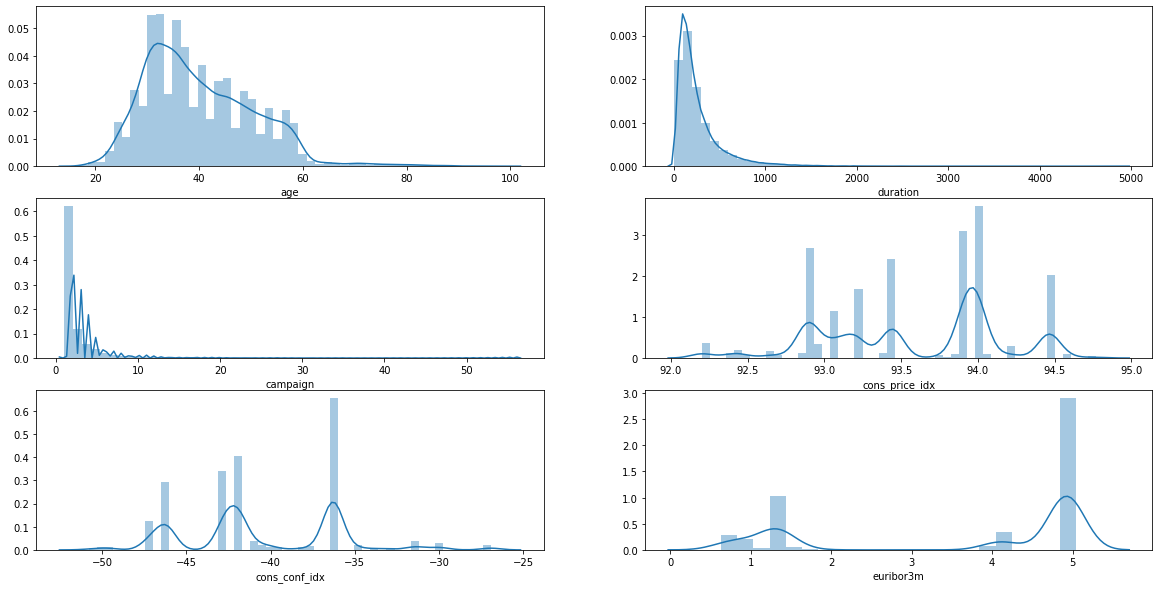

In [11]:
col=['age','duration','campaign','cons_price_idx','cons_conf_idx','euribor3m']
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for var, subplot in zip(col, ax.flatten()):
    sns.distplot(data[var], ax=subplot)

Modifying the variables 'age','duration','campaign' and 'euribor3m' to normalize the distriution graph which will yield better accuracy in modelling.

In [12]:
from scipy import stats
data['age']=np.log(data['age'])
data['duration']=np.log(data['duration'])
data['campaign']=stats.boxcox(data['campaign'])[0]
data['euribor3m']=(data['euribor3m'])**8

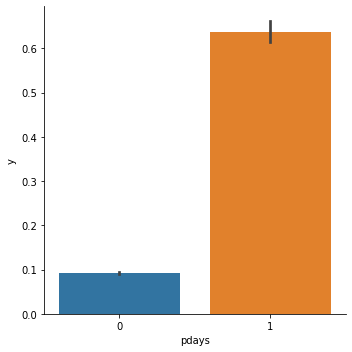

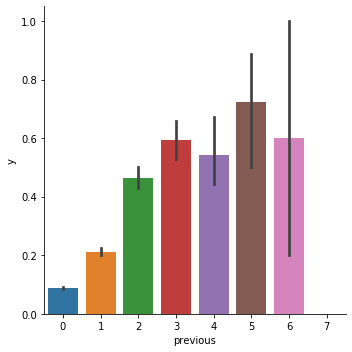

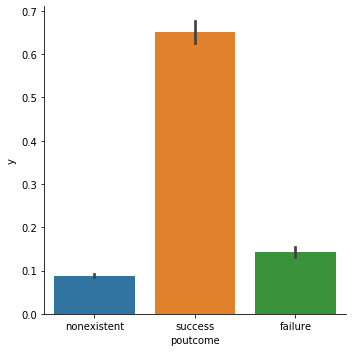

In [13]:
col1=['pdays','previous','poutcome']
for var in col1:
    sns.catplot(x=var, y='y',kind='bar',data=data)

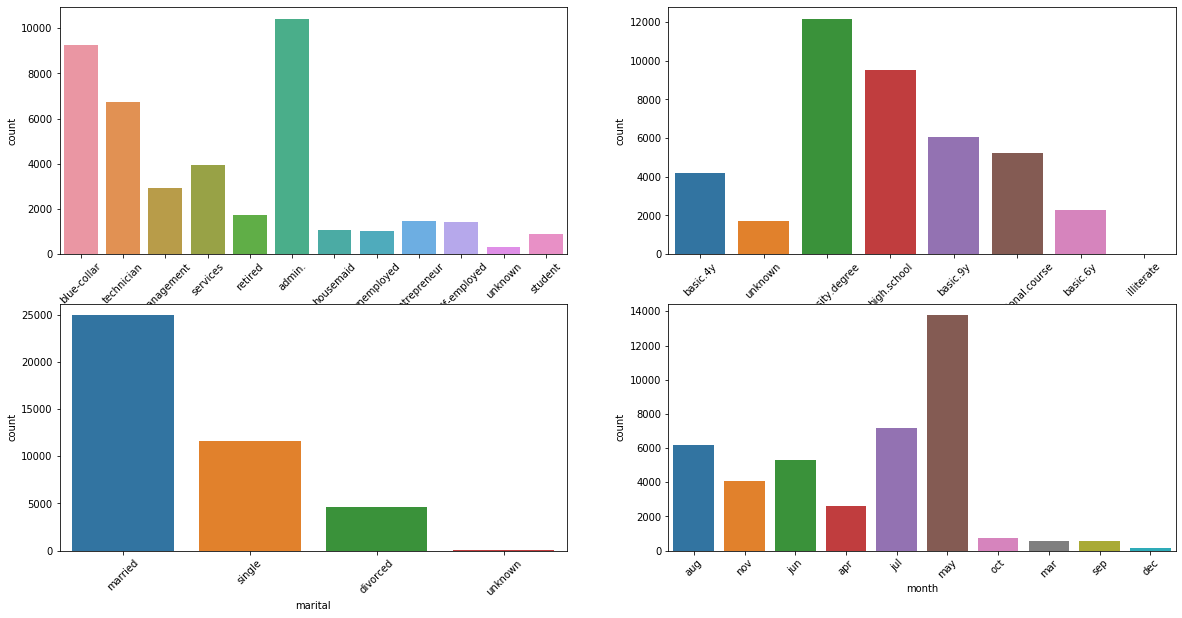

In [14]:
col2=['job','education','marital','month']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for var, subplot in zip(col2, ax.flatten()):
    sns.countplot(data[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

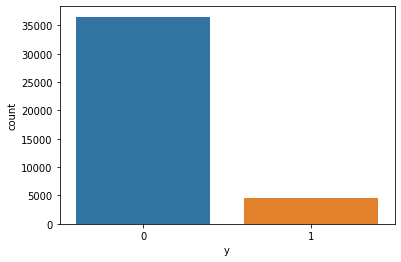

In [15]:
sns.countplot(data['y'])

Here in the above graph graph we can clearly see that the data distribution of the dependent variable is unbalanced. On applying these data in modelling we will get biased results. Hence we will apply a technique later on to remove this unbalance.

In [16]:
data['y']=data['y'].astype(object)
data['pdays']=data['pdays'].astype(object)

In [17]:
num_data=data.select_dtypes(exclude='object')
num_data.head(3)

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,3.784190,5.347108,0.000000,0,1.4,93.444,-36.1,368090.154736,5228.1
1,3.970292,4.927254,0.000000,0,-0.1,93.200,-42.0,68339.623971,5195.8
2,3.332205,5.826000,0.780308,2,-1.7,94.055,-39.8,0.079766,4991.6


We will now find the Pearson Correlation for all the numerical data.

In [18]:
num_columns=[u'age',u'duration',u'previous',u'emp_var_rate',u'cons_price_idx',u'euribor3m',u'nr_employed']
from scipy.stats import pearsonr

In [19]:
corr=[]
for i in num_columns:
    x=pearsonr(data[i],data['y'])
    corr.append(x)
corr

[(0.002693785800273933, 0.5846143889160127),
 (0.3494791563070543, 0.0),
 (0.23017169281559258, 0.0),
 (-0.29835859432119793, 0.0),
 (-0.13622994183544057, 8.691670923857363e-170),
 (-0.25670648186359657, 0.0),
 (-0.35469773441094354, 0.0)]

In [20]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=num_columns)
pvalue1

age                5.846144e-01
duration           0.000000e+00
previous           0.000000e+00
emp_var_rate       0.000000e+00
cons_price_idx    8.691671e-170
euribor3m          0.000000e+00
nr_employed        0.000000e+00
dtype: float64

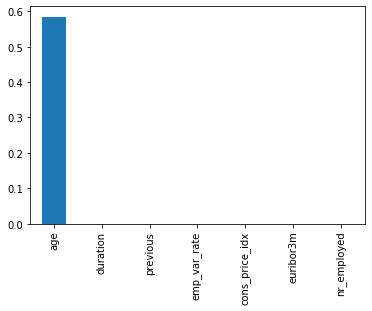

In [21]:
pvalue1.plot.bar()

Since pvalue of variable 'age' is much higher. so we will remove this column for modelling.

In [22]:
num_data=num_data.drop('age',1)
num_data.head(3)

,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,5.347108,0.000000,0,1.4,93.444,-36.1,368090.154736,5228.1
1,4.927254,0.000000,0,-0.1,93.200,-42.0,68339.623971,5195.8
2,5.826000,0.780308,2,-1.7,94.055,-39.8,0.079766,4991.6


In [23]:
cat_data=data.select_dtypes(include='object')
cat_data.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,y
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,0,nonexistent,0
1,technician,married,unknown,no,no,no,cellular,nov,fri,0,nonexistent,0
2,management,single,university.degree,no,yes,no,cellular,jun,thu,1,success,1


In [24]:
job=pd.get_dummies(cat_data['job'],prefix='job')
marital=pd.get_dummies(cat_data['marital'],prefix='marital')
edu=pd.get_dummies(cat_data['education'],prefix='education')
default=pd.get_dummies(cat_data['default'],prefix='default')
hous=pd.get_dummies(cat_data['housing'],prefix='housing')
loan=pd.get_dummies(cat_data['loan'],prefix='loan')
contact=pd.get_dummies(cat_data['contact'],prefix='contact')
month=pd.get_dummies(cat_data['month'],prefix='month')
day_of_week=pd.get_dummies(cat_data['day_of_week'],prefix='day_of_week')
pdays=pd.get_dummies(cat_data['pdays'],prefix='pdays')
poutcome=pd.get_dummies(cat_data['poutcome'],prefix='poutcome')

In [25]:
Cat_data=pd.concat([job,marital,edu,default,hous,loan,contact,month,day_of_week,pdays,poutcome],axis=1)
Cat_data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_0,pdays_1,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [26]:
x=Cat_data
y=cat_data['y'].astype(int)


We will now find the Chi-square test for the categorical data

In [27]:
from sklearn.feature_selection import chi2

In [28]:
chi_scores= chi2(x,y)
chi_scores

(array([3.03842000e+01, 1.76791586e+02, 1.10143409e+01, 1.70077541e+00,
        5.96381051e-03, 3.35581820e+02, 8.66861816e-01, 3.88561786e+01,
        3.55795830e+02, 1.30860243e+00, 8.73534634e+00, 9.76508243e-04,
        4.10471593e+00, 3.06101721e+01, 8.67228105e+01, 1.11543088e+00,
        4.32440094e+00, 2.15245656e+01, 7.15661708e+01, 1.74891397e+00,
        2.16110876e+00, 3.52238075e-02, 7.35991899e+01, 1.81067434e+01,
        8.49098185e+01, 3.21408223e+02, 3.80910683e-01, 2.77987580e+00,
        2.08115828e-01, 2.71179823e+00, 1.91159192e-01, 2.08115828e-01,
        7.01435616e-01, 3.15356304e+02, 5.48010979e+02, 2.23720241e+02,
        2.71318761e+00, 2.57850928e+02, 3.53648981e+01, 3.03257917e+00,
        8.42798166e+02, 3.21370585e+02, 5.17007463e+00, 7.63528581e+02,
        6.45444304e+02, 1.63056181e+00, 1.47703860e+01, 6.26478437e+00,
        2.15723694e+00, 1.30549013e+00, 1.59896384e+02, 4.18675225e+03,
        3.73174428e+01, 2.10603430e+02, 3.98204856e+03]),
 array

In [30]:
pvalue=pd.Series(chi_scores[1],index=x.columns)
pvalue=pvalue.sort_values(ascending=False,inplace=False)
pvalue

job_unknown                       9.750709e-01
job_management                    9.384440e-01
education_professional.course     8.511275e-01
loan_no                           6.619536e-01
loan_unknown                      6.482482e-01
housing_unknown                   6.482482e-01
default_yes                       5.371163e-01
loan_yes                          4.023017e-01
job_self-employed                 3.518256e-01
marital_unknown                   2.909044e-01
day_of_week_wed                   2.532128e-01
job_technician                    2.526478e-01
day_of_week_fri                   2.016254e-01
job_housemaid                     1.921866e-01
education_high.school             1.860133e-01
day_of_week_tue                   1.418997e-01
education_illiterate              1.415425e-01
housing_yes                       9.960865e-02
month_aug                         9.952195e-02
housing_no                        9.545557e-02
month_jun                         8.160820e-02
marital_divor

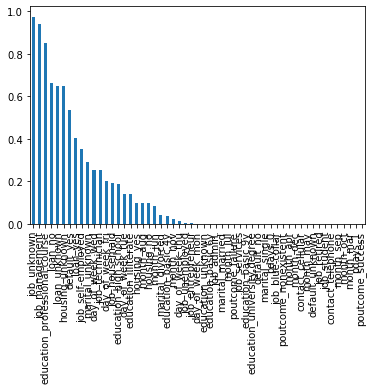

In [31]:
pvalue.plot.bar()

Here from the table we find out all the variables having pvalue greater than 0.05 and then remove them.

In [32]:
Cat_data=Cat_data.drop(['job_unknown','job_management','education_professional.course','loan_no','loan_unknown','housing_unknown',
                        'default_yes','loan_yes', 'job_self-employed','marital_unknown','day_of_week_wed','job_technician',
                        'day_of_week_fri','job_housemaid','education_high.school','day_of_week_tue','education_illiterate',
                        'housing_yes','month_aug','housing_no','month_jun'],1)

In [33]:
Cat_data.head(2)

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_divorced,marital_married,marital_single,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,pdays_0,pdays_1,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [34]:
num_data.head(2)

,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,5.347108,0.0,0,1.4,93.444,-36.1,368090.154736,5228.1
1,4.927254,0.0,0,-0.1,93.200,-42.0,68339.623971,5195.8


In [35]:
X=pd.concat([Cat_data,num_data],1)

In [36]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_divorced,marital_married,marital_single,...,poutcome_nonexistent,poutcome_success,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0,1,0,0,0,0,0,0,1,0,...,1,0,5.347108,0.000000,0,1.4,93.444,-36.1,368090.154736,5228.1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,4.927254,0.000000,0,-0.1,93.200,-42.0,68339.623971,5195.8
2,0,0,0,0,0,0,0,0,0,1,...,0,1,5.826000,0.780308,2,-1.7,94.055,-39.8,0.079766,4991.6
3,0,0,0,0,1,0,0,0,1,0,...,1,0,5.220356,0.555736,0,-1.8,93.075,-47.1,15.184853,5099.1
4,0,0,0,1,0,0,0,0,1,0,...,0,1,4.919981,0.000000,1,-2.9,92.201,-31.4,0.325206,5076.2


In [37]:
Y=data['y'].astype(int)

We will split the data into training and testing data then we will apply Logistic regression.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=2)

In [39]:
X_train.shape,X_test.shape

((28828, 42), (12356, 42))

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression without removing imbalance in dependent variable.

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [42]:
classifier.score(X_test,y_test)

0.9099223049530593

In [43]:
classifier.score(X_train,y_train)

0.9126543638129596

In [44]:
y_pred=classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,10633,306,10939
1,807,610,1417
All,11440,916,12356


In [46]:
confusion_matrix

array([[10633,   306],
       [  807,   610]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10939
           1       0.67      0.43      0.52      1417

    accuracy                           0.91     12356
   macro avg       0.80      0.70      0.74     12356
weighted avg       0.90      0.91      0.90     12356



Here we can see that recall of minority class of 'y' i.e 1 is very much less, which shows that there is imbalance in data distribution. We will use SMOTE (Synthetic Minority Oversampling Technique) to remove this imbalance in the data distribution.

In [48]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)   #y_train.ravel() 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 3223
Before OverSampling, counts of label '0': 25605 

After OverSampling, the shape of train_X: (51210, 42)
After OverSampling, the shape of train_y: (51210,) 

After OverSampling, counts of label '1': 25605
After OverSampling, counts of label '0': 25605


# Logistic regression after removing imbalance

In [49]:
classifier1 = LogisticRegression() 
classifier1.fit(X_train_res, y_train_res.ravel()) 
predictions = classifier1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10939
           1       0.45      0.89      0.60      1417

    accuracy                           0.86     12356
   macro avg       0.72      0.87      0.76     12356
weighted avg       0.92      0.86      0.88     12356



We have reduced the accuracy to 86% as compared to previous model but the recall value of minority class has also improved to 89 %. This is a good model compared to the previous one.

In [51]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [52]:
predictions.shape

(12356,)

In [54]:
A=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
A

,Actual,Predicted
5485,0,0
4390,0,0
38102,0,0
32034,0,1
5331,0,0
...,...,...
38722,0,1
22235,0,0
11380,0,1
26475,0,0


In [60]:
error=np.where(A['Actual']!=A['Predicted'])
error[0].shape

(1681,)

In [64]:
(error[0].shape[0]/predictions.shape[0])*100

13.604726448688897

Hence only 13% error can be seen in the predicted data